In [3]:
import pandas as pd
df=pd.read_csv('train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [8]:
import sklearn
print(sklearn.__version__)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

1.6.1


In [10]:
import numpy as np
x=df.iloc[:,0:20]
y=df.iloc[:,-1]

In [12]:
best_features=SelectKBest(score_func=chi2,k=10)
fit=best_features.fit(x,y)

In [14]:
dfscore=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)


In [17]:
featureScore = pd.concat([dfcolumns, dfscore], axis=1)
print(featureScore)

                0              0
0   battery_power   14129.866576
1            blue       0.723232
2     clock_speed       0.648366
3        dual_sim       0.631011
4              fc      10.135166
5          four_g       1.521572
6      int_memory      89.839124
7           m_dep       0.745820
8       mobile_wt      95.972863
9         n_cores       9.097556
10             pc       9.186054
11      px_height   17363.569536
12       px_width    9810.586750
13            ram  931267.519053
14           sc_h       9.614878
15           sc_w      16.480319
16      talk_time      13.236400
17        three_g       0.327643
18   touch_screen       1.928429
19           wifi       0.422091


In [19]:
featureScore.columns=['Specs','Score']
featureScore

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [20]:
print(featureScore.nlargest(10,'Score'))

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [22]:
print(model.feature_importances_)

[0.06275096 0.01936915 0.0324949  0.0190754  0.0318495  0.01565274
 0.03398182 0.03203051 0.03629128 0.03150288 0.03287485 0.04813594
 0.04861715 0.40569084 0.03228968 0.03320716 0.03348249 0.01358719
 0.01743078 0.01968478]


<Axes: >

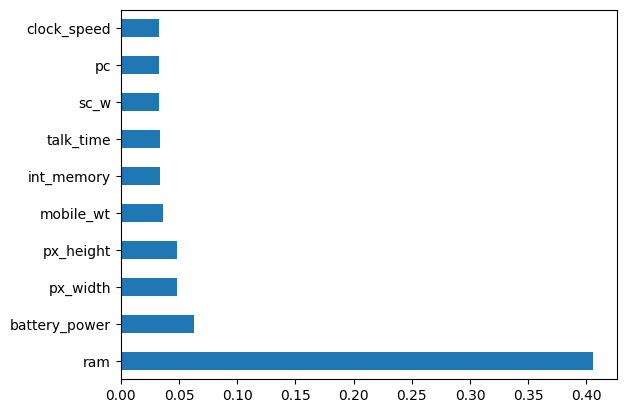

In [25]:
feat_importance=pd.Series(model.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')

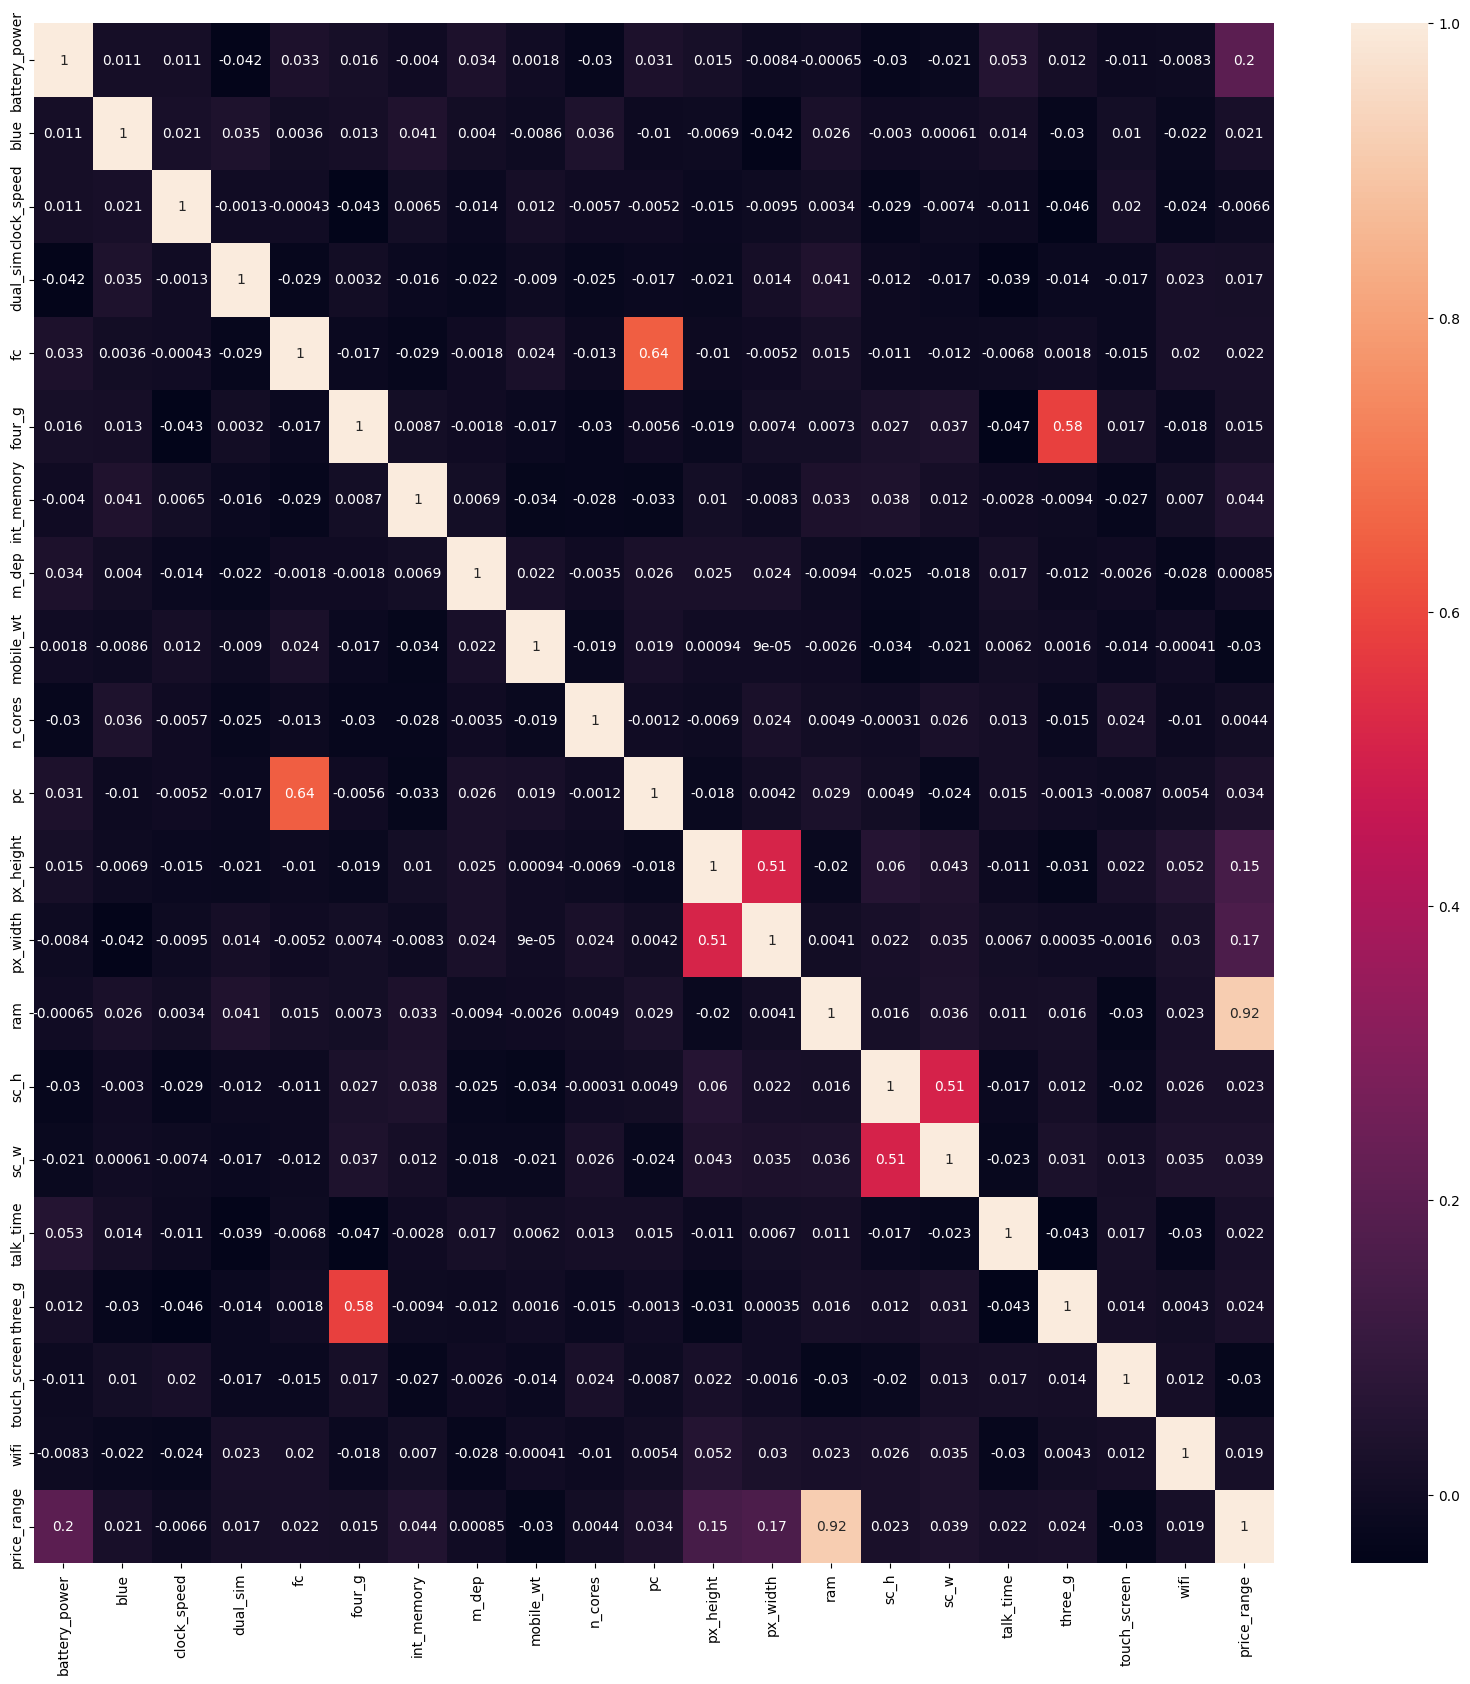

In [26]:
import seaborn as sns
corrmat=df.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_feature].corr(),annot=True)